In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Kişisel Tıbbi Maliyet Veri Setini inceleyelim. body mass index
df = pd.read_excel("dataset1.xlsx")
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,279,0,yes,southwest,16884924
1,18,male,3377,1,no,southeast,17255523
2,28,male,33,3,no,southeast,4449462
3,33,male,22705,0,no,northwest,2198447061
4,32,male,2888,0,no,northwest,38668552
...,...,...,...,...,...,...,...
1333,50,male,3097,3,no,northwest,106005483
1334,18,female,3192,0,no,northeast,22059808
1335,18,female,3685,0,no,southeast,16298335
1336,21,female,258,0,no,southwest,2007945


In [3]:
#öncelikle cinsiyet dağılımına bakalım
df["gender"].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gender', ylabel='Count'>

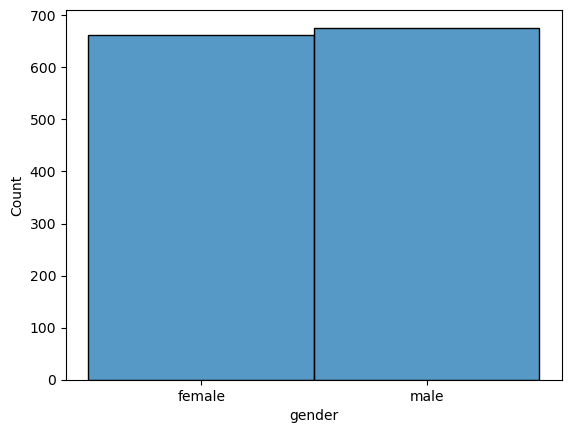

In [4]:
sns.histplot(x="gender", data=df)

In [14]:
#cinsiyetin kişisel tıbbi maliyet ile ilişkisine bakalım
data1 = df.groupby("gender")[["charges"]].mean().reset_index()
data1

,gender,charges
0,female,4.946297e+08
1,male,5.266107e+08


<Axes: xlabel='gender', ylabel='charges'>

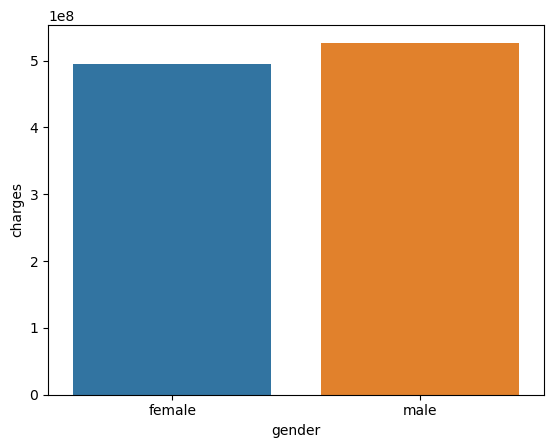

In [15]:
sns.barplot(x="gender", y= "charges", data = data1)


In [12]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
#region ve gendera göre inceleyelim
data2 = df.groupby(["region","gender"])[["charges"]].mean().reset_index()
data2

,region,gender,charges
0,northeast,female,7.919492e+08
1,northeast,male,8.864659e+08
2,northwest,female,6.987716e+08
3,northwest,male,7.329410e+08
4,southeast,female,3.657713e+08
5,southeast,male,3.180183e+08
6,southwest,female,1.316821e+08
7,southwest,male,2.048214e+08


<Axes: xlabel='region', ylabel='charges'>

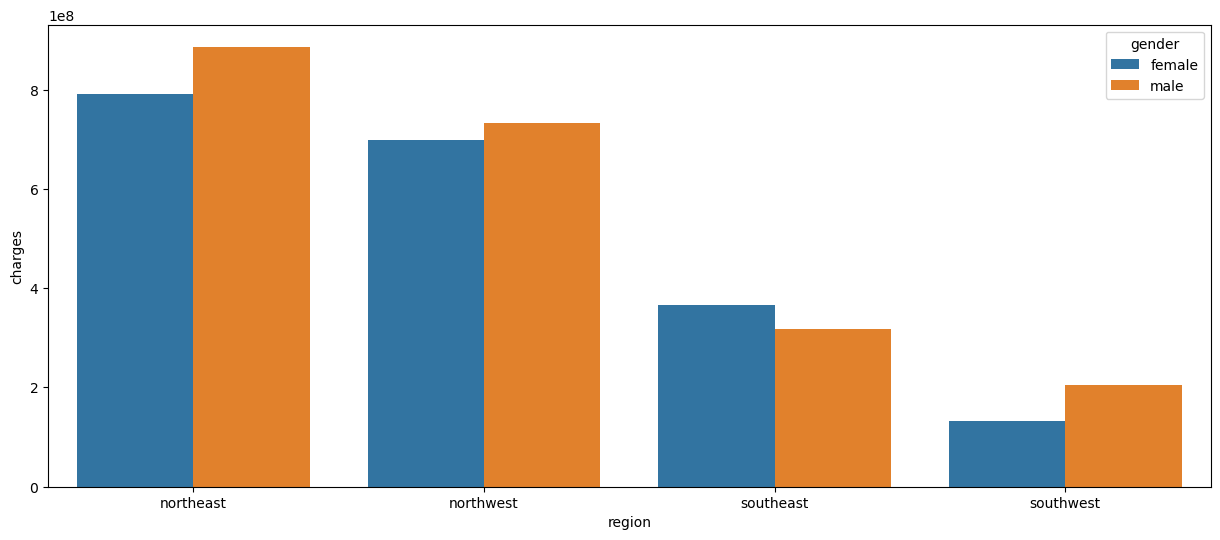

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x="region",y="charges",hue="gender",data=data2)

In [37]:
#yaşa ve cinsiyete göre smoker olmayı inceleyelim
data3 = df.groupby(["smoker","gender"])[["age"]].mean().reset_index()
data3

,smoker,gender,age
0,no,female,39.691042
1,no,male,39.061896
2,yes,female,38.608696
3,yes,male,38.446541


<Axes: xlabel='smoker', ylabel='age'>

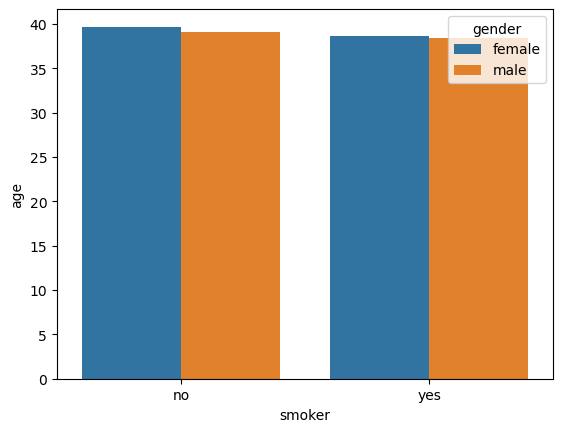

In [38]:
sns.barplot(x="smoker",y="age", hue="gender" ,data=data3)

<Axes: xlabel='age', ylabel='charges'>

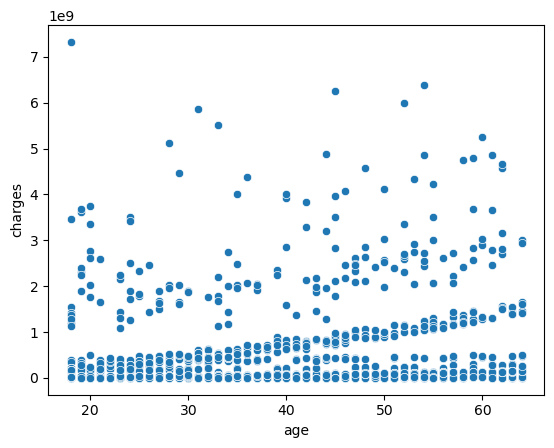

In [48]:
#yaşa göre charges değerlerini inceleyelim
sns.scatterplot(x="age",y="charges",data=df)

In [41]:
#çocuk olup olmamasına göre chargesa bakalım
data4 = df.groupby("children")[["charges"]].mean().reset_index()
data4

,children,charges
0,0,4.748056e+08
1,1,4.937156e+08
2,2,5.336528e+08
3,3,6.440374e+08
4,4,7.322714e+08
5,5,1.907824e+08


<Axes: xlabel='children', ylabel='charges'>

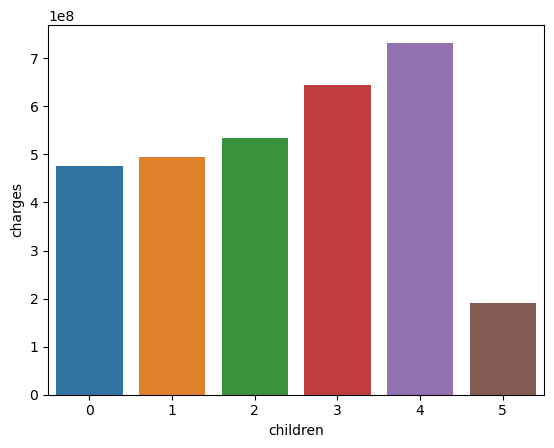

In [43]:
sns.barplot(x="children",y="charges",data=data4)

<Axes: xlabel='region', ylabel='charges'>

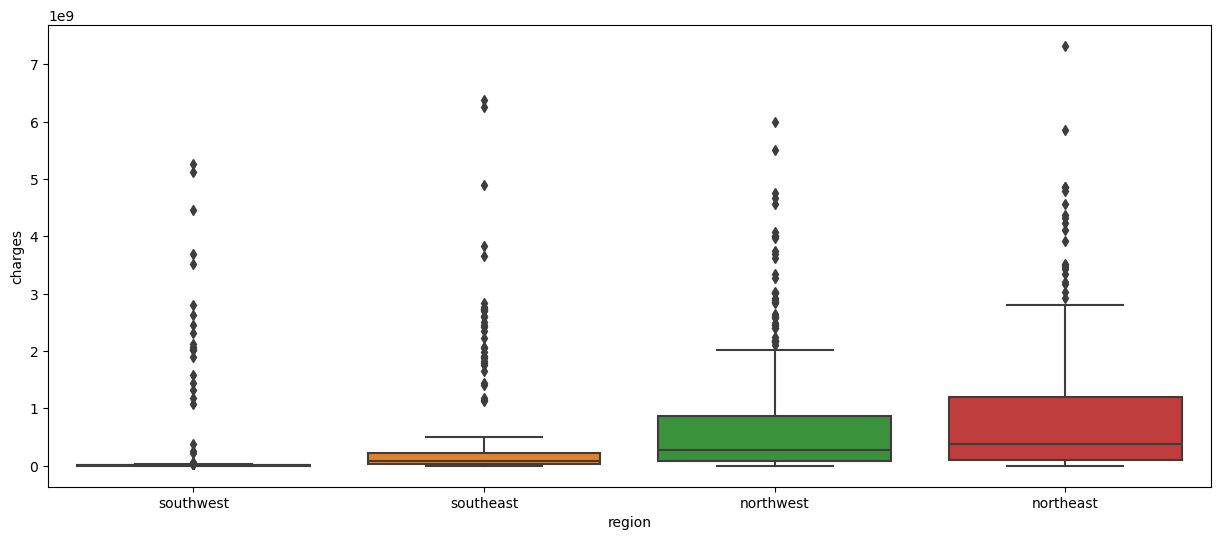

In [64]:
#regiona göre chargesa bakalım
plt.figure(figsize=(15,6))
sns.boxplot(x="region",y="charges",data=df)